## **EJ8_1 Datos Bancarios** - Álvaro Fernandez Becerra



#### El fichero **bancos.csv** contiene las cotizaciones de los principales bancos de España con  Empresa (nombre de la empresa), Apertura (precio de la acción a la apertura de bolsa), Máximo (precio máximo de la acción durante la jornada), Mínimo (precio mínimo de la acción durante la jornada), Cierre (precio de la acción al cierre de bolsa), Volumen (volumen al cierre de bolsa). 

### Construir las siguientes funciones: 

- 	Una función que reciba el fichero, un nombre de un banco y cree un diagrama de líneas con las series temporales de las cotizaciones de apertura, máximos y mínimos.
-	Una función que reciba el fichero bancos.csv y cree un diagrama de líneas con las series temporales de las cotizaciones de cierre de todos los bancos 
-	Una función que reciba el fichero bancos.csv y un parámetro con los siguientes posibles valores : apertura ,inicio, máximo y cierre y calcule el promedio del dato dado para cada banco y lo represente en un gráfico de barras comparativo de todos los bancos.
-	Una función que reciba el fichero bancos.csv y un parámetro opcional que pueda tomar el valor de uno de los bancos o quedar vacío (todos los bancos) y dibuje un gráfico de dispersión para explorar la relación entre el precio de Cierre y el Volumen de transacciones.




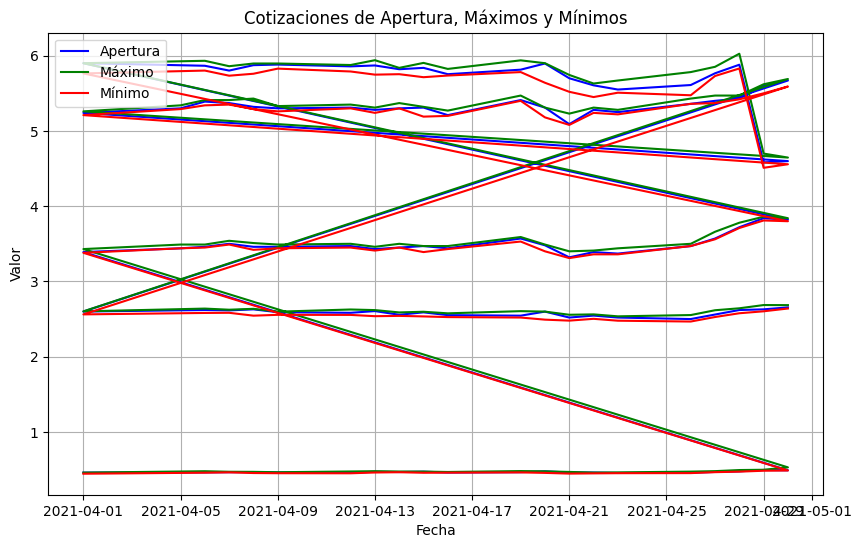

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
# Empresa,Fecha,Apertura,Máximo,Mínimo,Cierre,Volumen
archivo = 'bancos.csv'

def apertura_maximos_minimos(archivo):
    """
    Crea diagrama de lineas con las series temporales de las cotizaciones de apertura, maximos y minimos
    """
    csv = pd.read_csv(archivo, parse_dates=['Fecha'])
    plt.figure(figsize=(10, 6))
    plt.plot(csv['Fecha'], csv['Apertura'], label='Apertura', color='blue')
    plt.plot(csv['Fecha'], csv['Máximo'], label='Máximo', color='green')
    plt.plot(csv['Fecha'], csv['Mínimo'], label='Mínimo', color='red')
    plt.xlabel('Fecha')
    plt.ylabel('Valor')
    plt.title('Cotizaciones de Apertura, Máximos y Mínimos')
    plt.legend()
    plt.grid()
    plt.show()

apertura_maximos_minimos(archivo)



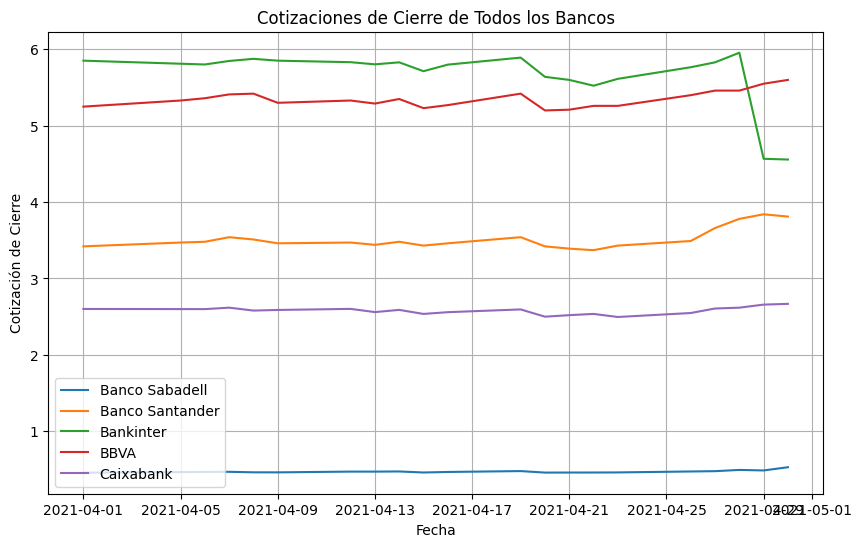

In [ ]:
archivo = 'bancos.csv'

def cotizaciones_cierre(archivo):
    """
        Una función que reciba el fichero bancos.csv y cree un diagrama de líneas con las series temporales de las cotizaciones de cierre de todos los bancos.
    """
    csv = pd.read_csv(archivo, parse_dates=['Fecha'])
    plt.figure(figsize=(10, 6))

    # Lista de bancos individuales
    bancos = csv['Empresa'].unique()
    for banco in bancos:
        # Obtener datos por cada banco
        datos_banco = csv[csv['Empresa'] == banco]
        plt.plot(datos_banco['Fecha'], datos_banco['Cierre'], label=banco)
    plt.xlabel('Fecha')
    plt.ylabel('Cotización de Cierre')
    plt.title('Cotizaciones de Cierre de Todos los Bancos')
    plt.legend()
    plt.grid()
    plt.show()

cotizaciones_cierre(archivo)

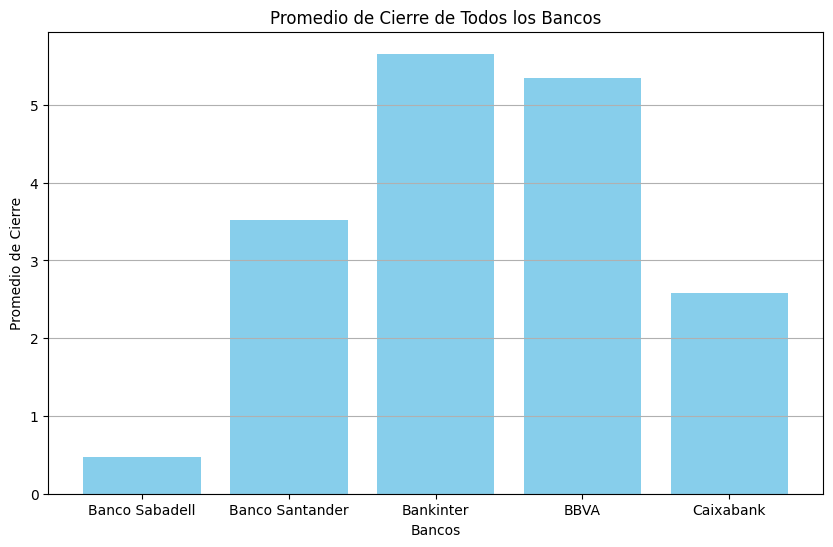

In [12]:
archivo = 'bancos.csv'

def promedio_comparativo(archivo, param):
    """
        Funcion que reciba el fichero bancos.csv y un parámetro con los siguientes posibles valores : apertura ,inicio, máximo y cierre 
        y calcule el promedio del dato dado para cada banco y lo represente en un gráfico de barras comparativo de todos los bancos.
    """
    csv = pd.read_csv(archivo)
    bancos = csv['Empresa'].unique()
    promedios = {}
    # PRomedio por banco
    for banco in bancos:
        datos_banco = csv[csv['Empresa'] == banco]
        promedios[banco] = datos_banco[param].mean() 
    plt.figure(figsize=(10, 6))
    plt.bar(promedios.keys(), promedios.values(), color='skyblue')
    plt.xlabel('Bancos')
    plt.ylabel(f'Promedio de {param}')
    plt.title(f'Promedio de {param} de Todos los Bancos')
    plt.grid(axis='y')
    plt.show()

promedio_comparativo(archivo, 'Cierre')

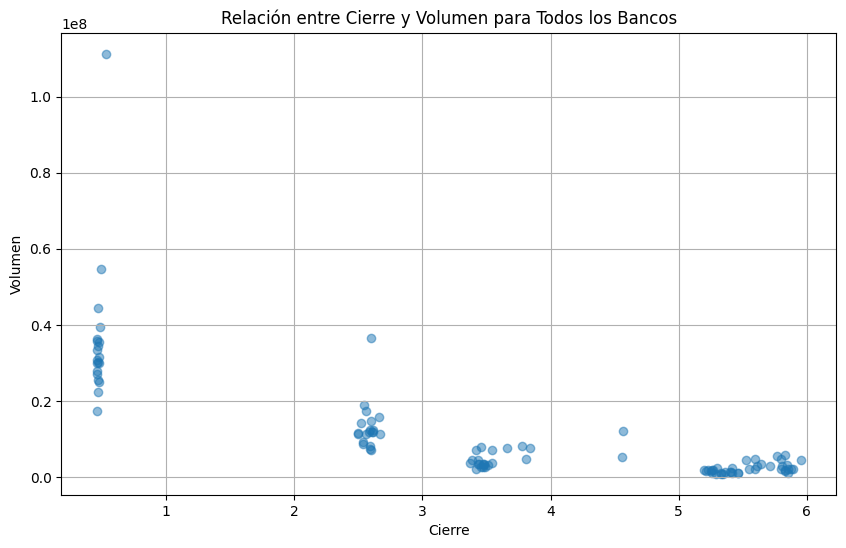

In [13]:
archivo = 'bancos.csv'

def relacion_cierre_volumen(archivo, param):
    """
        Una función que reciba el fichero bancos.csv y un parámetro opcional que pueda tomar el valor de uno de los bancos o quedar vacío (todos los bancos) 
        y dibuje un gráfico de dispersión para explorar la relación entre el precio de Cierre y el Volumen de transacciones.
    """
    csv = pd.read_csv(archivo)
    # Si existe el parametro(banco) y es un banco válido
    if (param) and (param in csv['Empresa'].values):
        datos_banco = csv[csv['Empresa'] == param]
        plt.figure(figsize=(10, 6))
        plt.scatter(datos_banco['Cierre'], datos_banco['Volumen'], alpha=0.5)
        plt.xlabel('Cierre')
        plt.ylabel('Volumen')
        plt.title(f'Relación entre Cierre y Volumen para {param}')
        plt.grid()
        plt.show()
    else:
        plt.figure(figsize=(10, 6))
        plt.scatter(csv['Cierre'], csv['Volumen'], alpha=0.5)
        plt.xlabel('Cierre')
        plt.ylabel('Volumen')
        plt.title('Relación entre Cierre y Volumen para Todos los Bancos')
        plt.grid()
        plt.show()

relacion_cierre_volumen(archivo, 'CaixaBank')